In [15]:
import time
%matplotlib inline 
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 9)
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
def show_plots(realtime = True,t=0):
    fig, axs = plt.subplots(ncols=2,nrows =2)
    loss_df = pd.read_csv("./objects/loss_df.csv").tail(10000)
    scores_df = pd.read_csv("./objects/scores_df.csv").tail(10000)
    actions_df = pd.read_csv("./objects/actions_df.csv")
    q_max_df = pd.read_csv("./objects/q_values.csv")
    loss_df['loss'] = loss_df['loss'].astype('float').tail(10000)
    loss_df.plot(use_index=True,ax=axs[0,0])
    scores_df.plot(ax=axs[0,1])
    sns.distplot(actions_df,ax=axs[1,0])
    q_max_df.plot(ax = axs[1,1])
    imgg = fig.canvas.draw()
    graph_img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    graph_img = graph_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#     disp = show_img(graphs=True)
#     disp.__next__()
    cv2.imwrite("logs/progress/pg"+str(t)+".png",graph_img) if realtime else 0

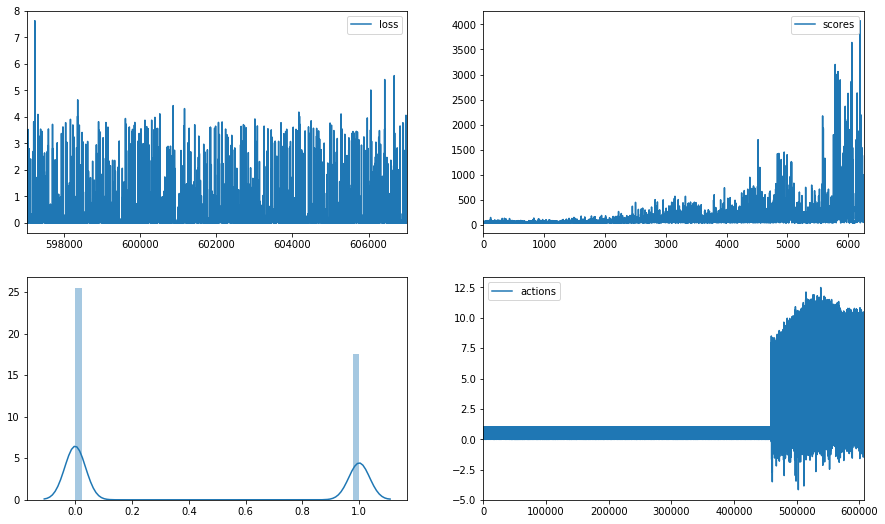

In [17]:
show_plots(realtime=False)

In [18]:
import pandas as pd
scores_df = pd.read_csv("./objects/scores_df.csv")

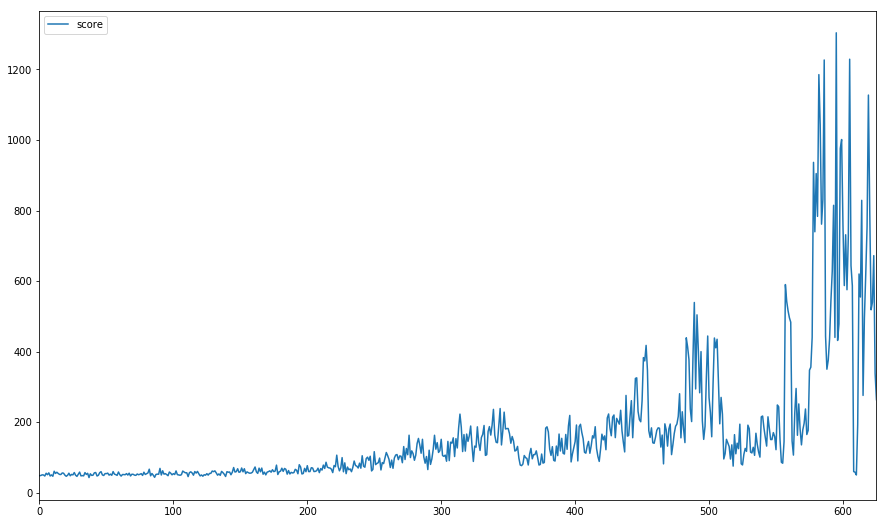

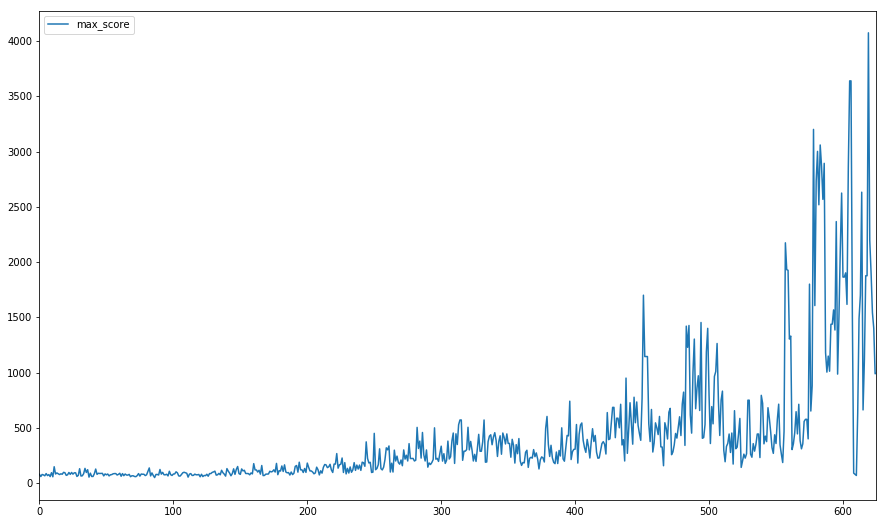

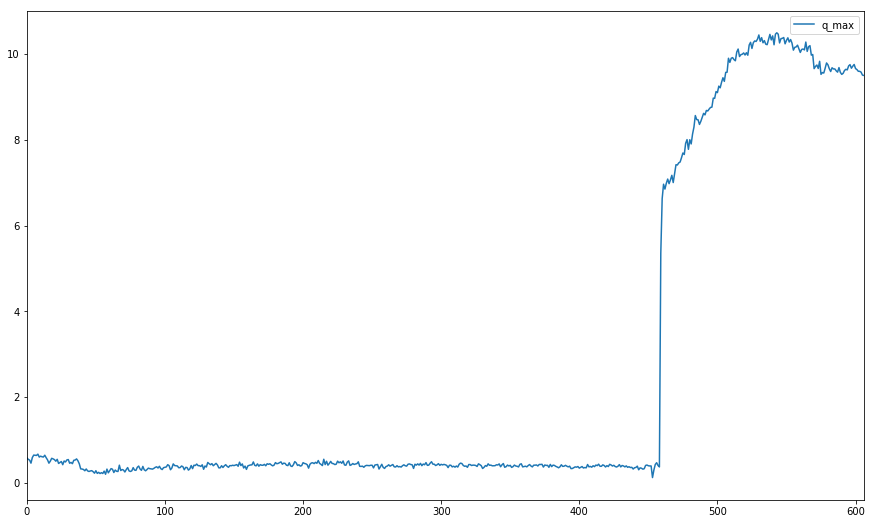

In [19]:
import pandas as pd
start = 0
interval = 10
scores_df = pd.read_csv("./objects/scores_df.csv")
mean_scores = pd.DataFrame(columns =['score'])
actions_df = pd.read_csv("./objects/actions_df.csv")
max_scores = pd.DataFrame(columns =['max_score'])
q_max_scores = pd.DataFrame(columns =['q_max'])
while interval <= len(scores_df):
    mean_scores.loc[len(mean_scores)] = (scores_df.loc[start:interval].mean()['scores'])
    max_scores.loc[len(max_scores)] = (scores_df.loc[start:interval].max()['scores'])
    start = interval
    interval = interval + 10
q_max_df = pd.read_csv("./objects/q_values.csv")

start = 0
interval = 1000
while interval <=len(q_max_df):
    q_max_scores.loc[len(q_max_scores)] = (q_max_df.loc[start:interval].mean()['actions'])
    start = interval
    interval = interval + 1000
    
mean_scores.plot()
max_scores.plot()
q_max_scores.plot()


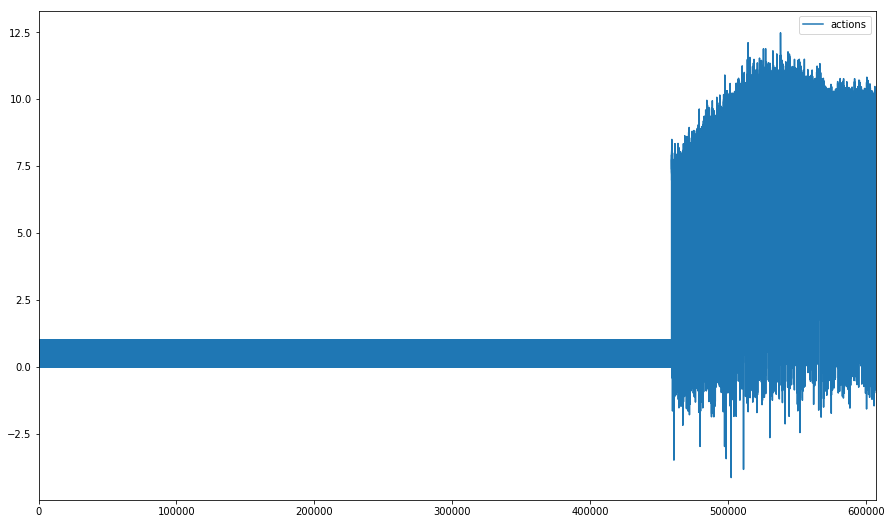

In [20]:
q_max_df = pd.read_csv("./objects/q_values.csv")
q_max_df.plot()

In [21]:
loss = pd.read_csv('./objects/loss_df.csv')

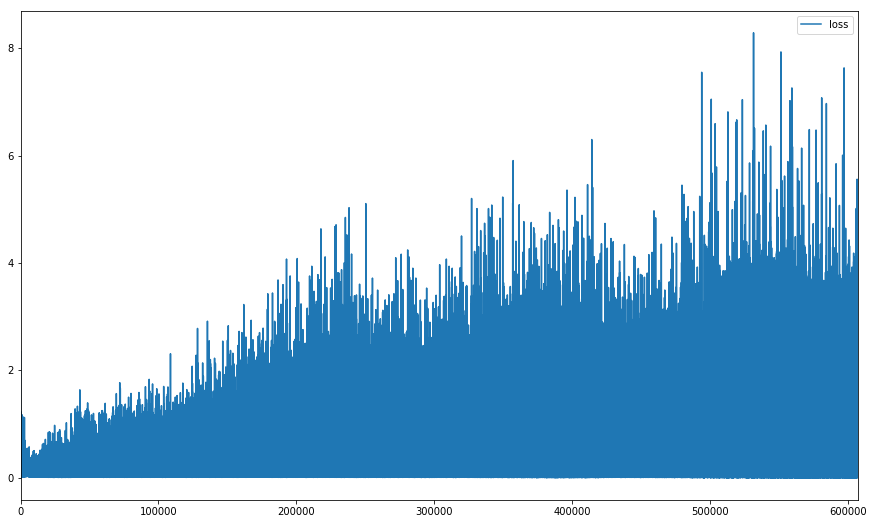

In [22]:
loss.plot()

In [11]:
scores_df.max()

scores    3200
dtype: int64

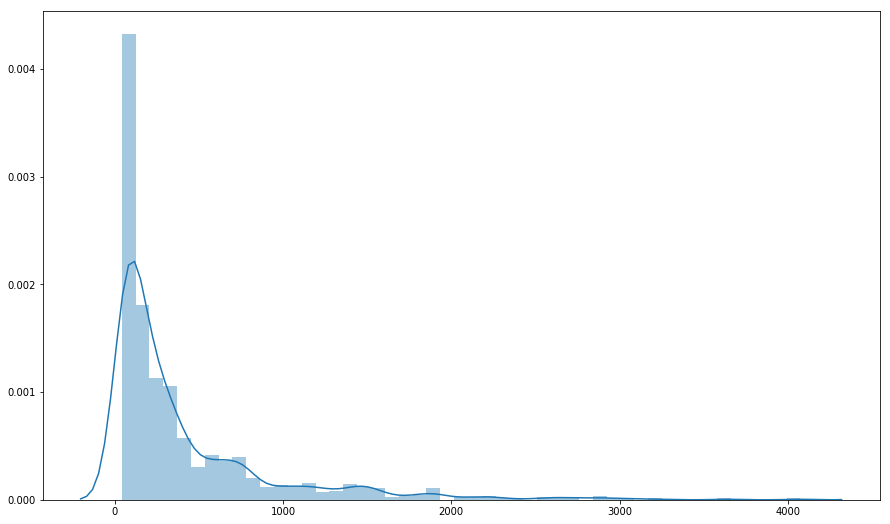

In [27]:
sns.distplot(scores_df.tail(1000))